In [2]:
import spacy

# Tokenization

Tokenization refers to the process of splitting the bulk text data into words, punctuation marks, and so on. Each of these entities is known as a token.

In spaCy, tokens are represented by objects of the Token class. spaCy can tokenize the data into individual tokens based on the rules of the language so that they can be analyzed more efficiently.

Though the task of tokenization may be as simple as splitting the sentences based on the appearance of spaces at first, it can be a much more complicated task, which is intricately linked with the language in question.

For example, in "What's your name?", the tokens are "What" and "'s" and not just "What's".

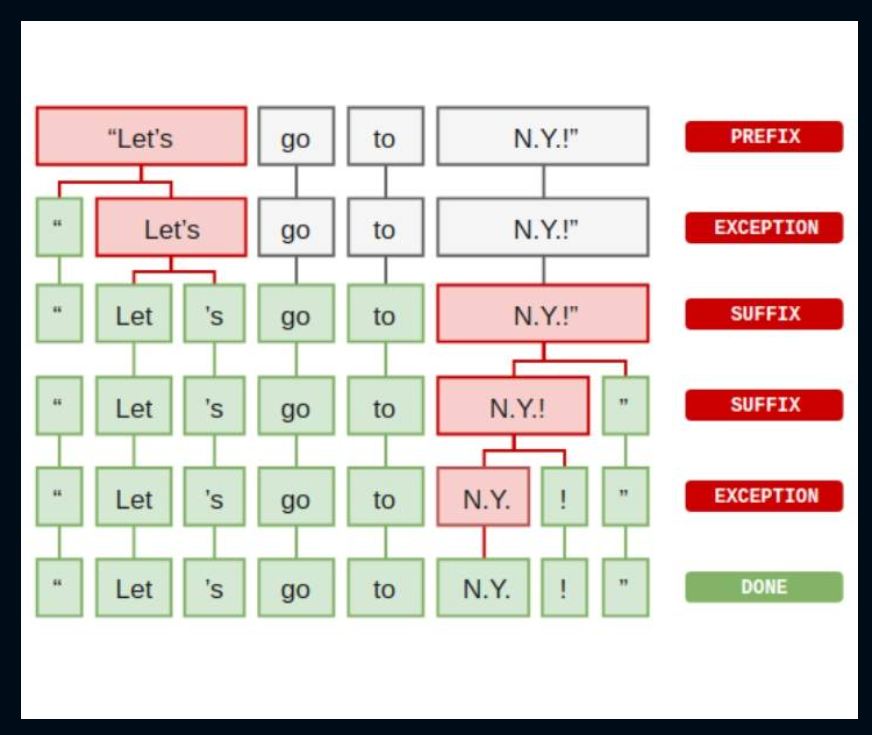

# Part of Speech (POS)

Part of Speech (POS) refers to the category to which a token in a language belongs to, as determined by their significance in the syntax of that language.

The process of identifying the POS of the tokens that you obtain as a result of tokenization on the rules of the language in question is known as POS tagging.

spaCy stores the strings associated with the tokens in hashed form to save space.

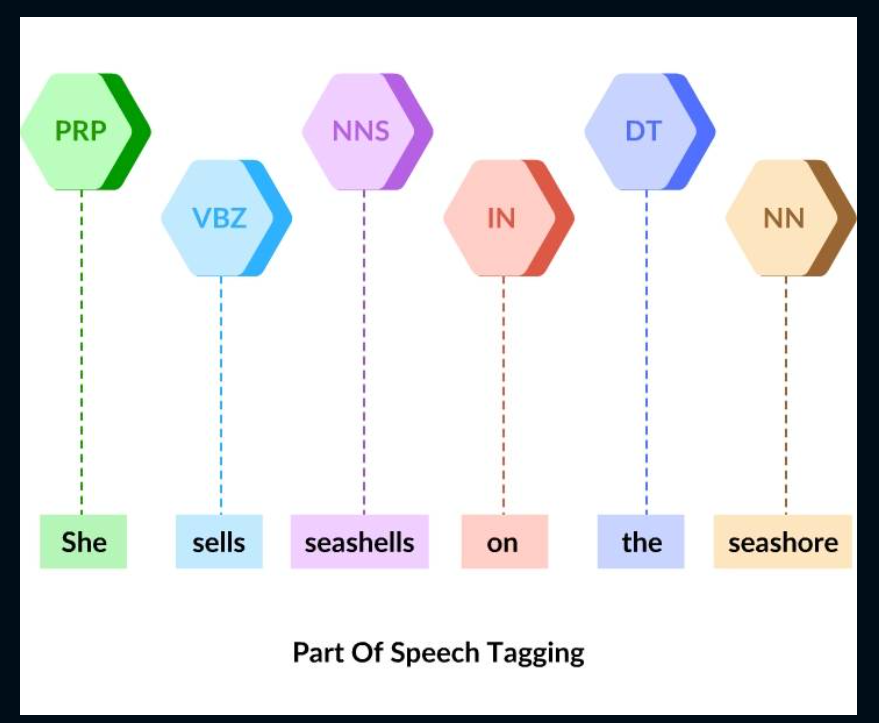

# Lemmatization

Lemmatization means finding the base word corresponding to a word. This base word is known as the lemma of that word.

Lemmatization is done to perform some normalization of the input data.

Finding the base word is helpful in better analyzing the input text.

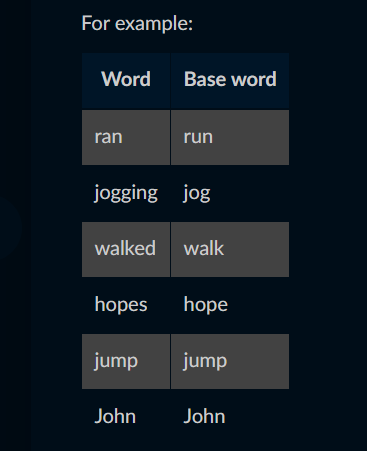

# Sentence Boundary Detection


The input text data often needs to be split into sentences for NLP. The process of identifying parts of the input data that can be classified as sentences is known as sentence boundary detection.

This task can be complicated due to the presence of dots as part of names, web addresses, etc.

For example,

The author, H. G. Wells, wrote a lot of other books.
A naive detection algorithm may be fooled into thinking that each dot ends a sentence, which is not the case.

spaCy intelligently performs sentence boundary detection considering such details.

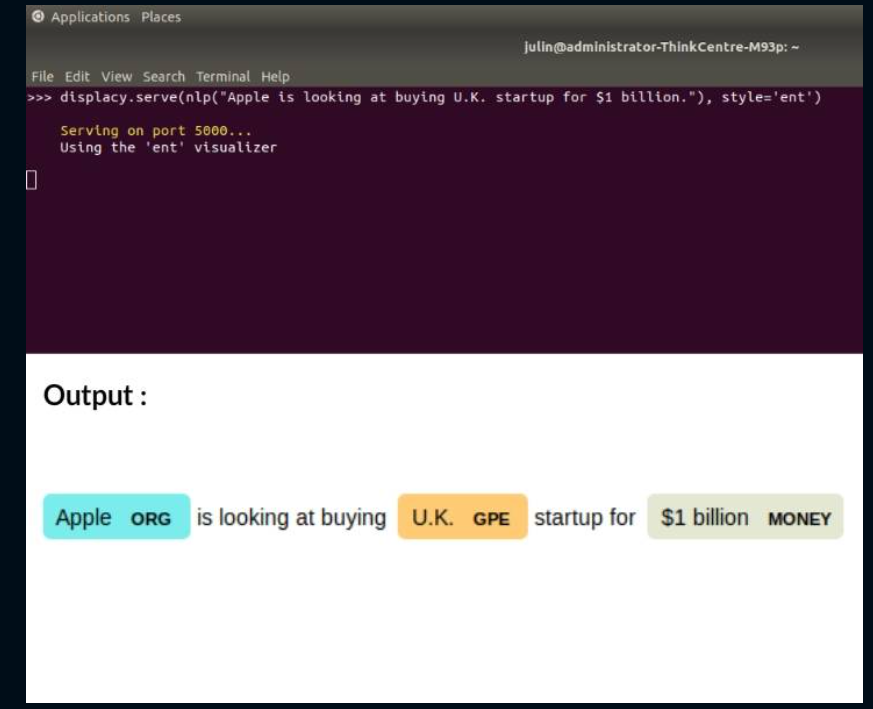

# NER

A named entity is a real-world object that is given a name. For example, a person who is given a name like 'John' or a book with the title 'One Hundred Years of Solitude'.

Named entity recognition (NER) is the process of identifying the parts of the input text and classifying them into a set of pre-defined categories or named entities.

spaCy is capable of performing NER with the assistance of statistical models.

spaCy has some pre-trained models, but they need to be fine-tuned to fit your needs more specifically.

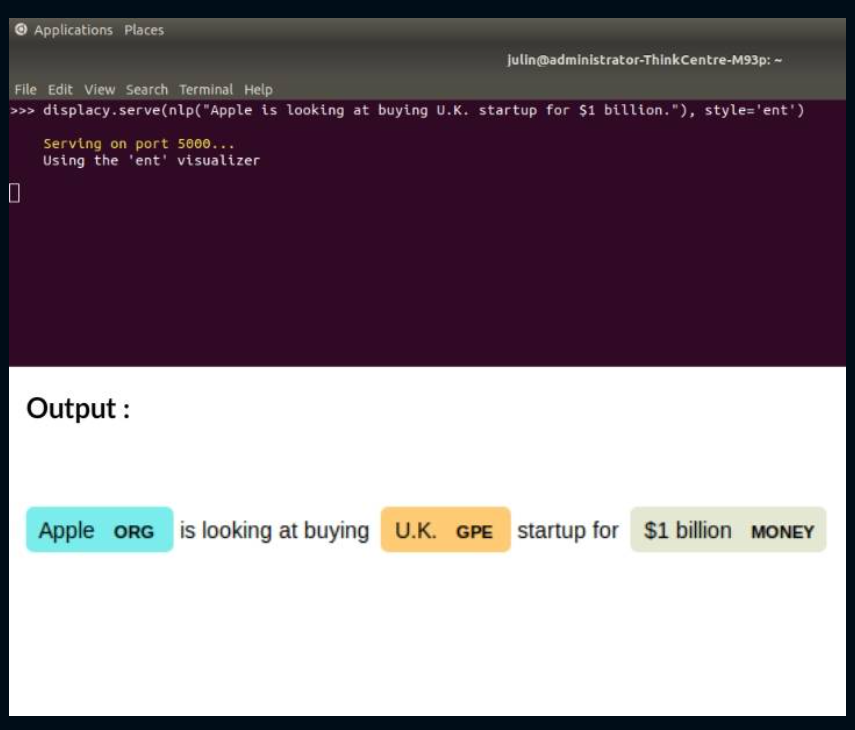

# Similarity


spaCy can compare two entities and predict how similar they are. This ability is highly useful in identifying duplicate entries and in finding recommendations.

Every Token object has a similarity() method which gives a number. Higher this number, higher the similarity.

This means, a token when compared with itself would give the maximum similarity score (which may not always be 1 due to vector math and floating point imprecisions).

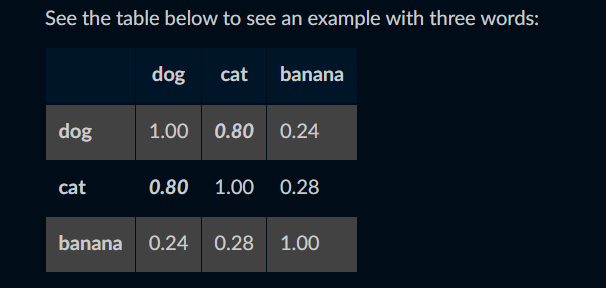

# Architecture

When the model of spaCy is used, spaCy performs tokenization on the input text to give an object of the Doc class. This Doc object is further processed in a procedure involving a set of processes known as the processing pipeline.

spaCy has some default models that are optimized for performance. However, custom models can also be made.

The default pipeline consists of:

a tagger for identifying the POS tags,
a parser
an entity recognizer
Each of these parts takes the Doc object and returns a processed version of it, which is another Doc object and passes it on to the next component in the pipeline.

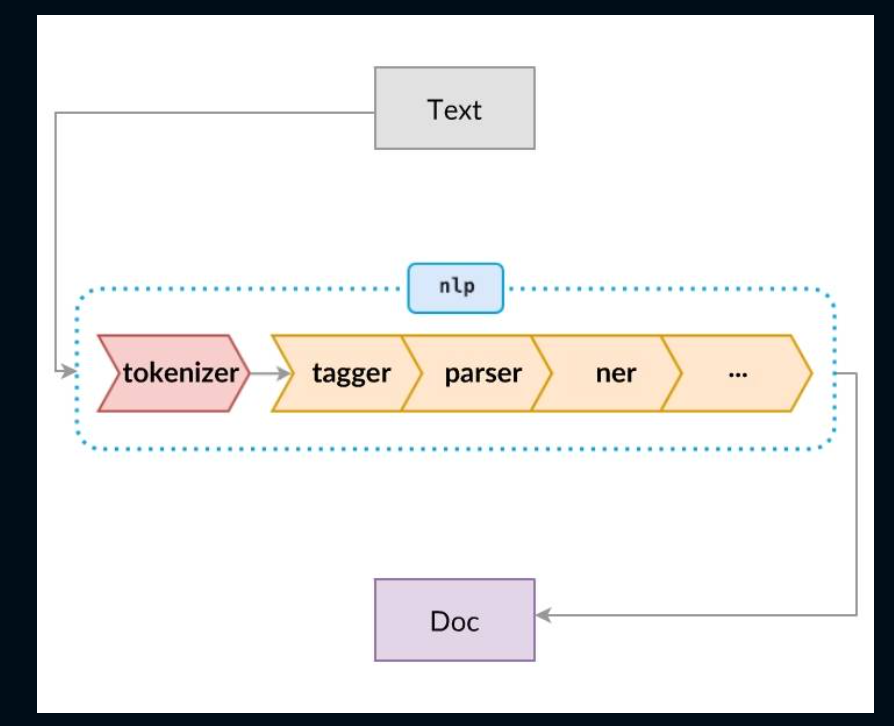

The primary data structures in spaCy are:

Doc

Vocab

Doc object has the collection of tokens from the input text data.

Vocab object provides a set of look-up tables, which ensures that common information is available across documents.

Strings and word vectors are stored in a centralized manner and there is only one source of this data, which ensures integrity.

**A Doc object is a collection of Token objects.**

Span and Token objects are effectively mere views of the parts of the Doc object. The real data is owned by the Doc.

Doc object has many metadata including annotations and other linguistic information.

Slicing a Doc object produces Span objects.

For example,
````
doc  = [x for x in nlp('Spacy is used for natural language processing.')

doc_slice = doc[4:]
````
here, doc is a Doc object and doc_slice is a Span object.

print(doc_slice) would print

````natural language processing.````

**Span**


The data belongs to the Doc object, and Span object provides a view into the Doc in the form of a slice from the data from the Doc object.

````
doc = nlp("The quick brown fox jumps over the lazy dog")

spn = doc[1:3]
````

Here, doc is an object of type Doc and spn is of type Span.

doc[1:3] will give the words in the first and second index in spn.

So,

print(doc[1:3])

will print

quick brown

**Token**


Each of the entities produced as a result of subjecting the input text to the tokenization process is known as a token.

A token in spaCy is represented using an object of class Token.

Examples of a token include words, punctuation marks, white spaces, etc.

Like Span, Token is also just a view into the corresponding Doc object.

The actual data belongs to the Doc object.

In



```
doc = nlp('Spacy is used for doing natural language processing.')

l = [token for token in doc]
```



doc will be a Doc object and l will be a list of Tokens.

The value of l would be [Spacy, is, used, for, doing, natural, language, processing, .]

Note that even the full stop denoting the end of the sentence is a Token.

**String Store**


- spaCy stores all the strings in the data that it is handling in a centralized manner in a location called the String store.

- spaCy handles the strings in terms of its hashes as it saves space.

- When the string version of the 64-bit hash is needed, SpaCy consults the string store to obtain it.

- The 'single-source' way of storing the string ensures integrity and consistency.

- If you get a hash version of a string using the attribute of an object, you can get the string version by appending an underscore (_) to the attribute's name.

- For example, you can get the hash form of the POS tag of a Token object via its pos attribute. You can get the string version using pos_.

**Vocab and Lexeme**


An object of the Vocab class in spaCy stores the words or vocabulary along with other data shared across a particular language.

Each entry in an object of the Vocab class is known as a Lexeme. Unlike a Token, a Lexeme has no contextual information like POS tag. It is just a word type.

In [3]:
nlp = spacy.load('en_core_web_sm')

# POS Tagging


In [4]:
doc = nlp('quick brown fox jumps over the lazy frog')
print( [(token, token.pos_) for token in doc] )

[(quick, 'ADJ'), (brown, 'ADJ'), (fox, 'NOUN'), (jumps, 'VERB'), (over, 'ADP'), (the, 'DET'), (lazy, 'ADJ'), (frog, 'NOUN')]


POS	DESCRIPTION	EXAMPLES

ADJ	adjective	big, old

ADP	adposition	in, to

ADV	adverb	very, tomorrow

AUX	auxiliary	is, has (done)

CONJ	conjunction	and, or

CCONJ	coordinating conjunction	and, but

DET	determiner	a, an

INTJ	interjection	psst, hello

NOUN	noun	girl, cat

NUM	numeral	1, seventy-seven, IV

PART	particle	's, not,

PRON	pronoun	I, you

PROPN	proper noun	Mary, John

PUNCT	punctuation	., (, ), ?

SCONJ	subordinating conjunction	if, while

SYM	symbol	$, §, ©, +,:), 😝

VERB	verb	run, runs, running

X	other	sfpksdpsxmsa

SPACE	space

You can check what any of the abbreviations in spaCy mean using the explain() method.

Like

````
spacy.explain('ADP')
````

would give

````
adposition
````

In [9]:
sent = "Generations to come may not believe that such a man lived."

doc = nlp(sent)
print( [(token,token.tag_, token.pos_, token.dep_) for token in doc] )

[(Generations, 'NNS', 'NOUN', 'nsubj'), (to, 'TO', 'PART', 'aux'), (come, 'VB', 'VERB', 'csubj'), (may, 'MD', 'AUX', 'aux'), (not, 'RB', 'PART', 'neg'), (believe, 'VB', 'VERB', 'ROOT'), (that, 'IN', 'SCONJ', 'mark'), (such, 'PDT', 'DET', 'predet'), (a, 'DT', 'DET', 'det'), (man, 'NN', 'NOUN', 'nsubj'), (lived, 'VBD', 'VERB', 'ccomp'), (., '.', 'PUNCT', 'punct')]


# Visualizers

spaCy offers tools named visualizers to help us visualize and understand the NLP process better.

This include:

displaCy

displaCy ENT

displaCy is used for visualising the syntactic dependencies and POS tags.

displaCy ENT is used to visualize the named entities. It highlights the named entities and their labels.

In [15]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')
doc = nlp('A demo of displaCy.')
displacy.render(doc, style='dep', jupyter=True) #use display.serve instead of render if not in jupyter

Irrespective of the way used to obtain the visualization, the style argument of the corresponding function should be dep to use the dependency visualization.

The quickest way to visualize the data is using the displacy.serve() method.

It will create a simple web server with the visualization which you can view using a web browser.

displaCy dependency visualizer, ent, is used to view the named entities in the input text along with their labels.

In [14]:
doc = nlp("Leo Tolstoy wrote 'War and Peace'.")
displacy.render(doc, style='ent', jupyter=True)

Visualization as Raw HTML
If you don't want to set up a web server just for the sake of seeing the visualization, displaCy can give you the HTML code that can be used to display it.

The displacy.render() method, with its page argument True, can be used for this.

Like
````
html = displacy.render([doc1, doc2], style='dep', page=True)
````

Now the variable html will have the HTML code for generating the visualization.

# NER

In [19]:
doc = nlp("Apple is one of the most influential and valuable companies based out of USA.")

print( [(ent.text, ent.label_) for ent in doc.ents] )

[('Apple', 'ORG'), ('USA', 'GPE')]


In [20]:
displacy.render(doc, style='ent', jupyter=True)

# Stop words

is_stop attribute

In stop word removal, you will have a list of stop words, the input text is checked for the presence of these words, and if found, they are removed.

For the default English model in spaCy, STOP_WORDS from the spacy.lang.en.stop_words module will have a list of stop words by default.

from spacy.lang.en.stop_words import STOP_WORDS
You can add or remove stop words just the way we want as well by using the is_stop attribute of lexemes.

In [21]:
print( nlp.vocab['the'].is_stop )

True


You can ask spaCy to treat a word which is not a stop word by default as a stop word by setting the is_stop attribute to True.

In [23]:
nlp.vocab['organisation'].is_stop = True
nlp.vocab['the'].is_stop = False

# NP Chunking

In [24]:
print( [x for x in doc.noun_chunks] )

[Apple, the most influential and valuable companies, USA]


# Parser

Spacy's syntactic dependency parser is one of the best in the world and is one of its main features that make spaCy stand out.

This parser also performs sentence boundary detection.

You can check if Doc object is parsed using its is_parsed boolean attribute which will be True if parsing has been performed.

Now, let's iterate over the tokens in doc and see what information has been gathered as a result of parsing.

children attribute of a Token would give a generator for its children in the parse tree.
````
for t in doc:
  print(t.text, t.dep_, t.head.text, [child for child in t.children])
````  
We are printing:

the text of the token
dependency relation as a string
parent in a dependency graph as a string
the list of children for the token in the dep graph

In [25]:
for t in doc:
  print(t.text, t.dep_, t.head.text, [child for child in t.children])

Apple nsubj is []
is ROOT is [Apple, one, .]
one attr is [of]
of prep one [companies]
the det companies []
most advmod influential []
influential amod companies [most, and, valuable]
and cc influential []
valuable conj influential []
companies pobj of [the, influential, based]
based acl companies [out]
out prep based [of]
of prep out [USA]
USA pobj of []
. punct is []


# Dependency Parsing

Spacy constructs a parse tree to find out the dependencies between the words in the input text. This dependency tree is useful for text chunking.

Every token in the parse tree other than the root will have only one parent. The parent of a token in the parse tree is known as its head in spacy terminology.

Also, the child tokens of a token, if any, in the parse tree are called its children.

The syntactic relation between the head and the child is known as dep. The dep of a Token can be obtained from its dep attribute.

In [26]:
print( [(t.text, t.dep_) for t in doc] )

[('Apple', 'nsubj'), ('is', 'ROOT'), ('one', 'attr'), ('of', 'prep'), ('the', 'det'), ('most', 'advmod'), ('influential', 'amod'), ('and', 'cc'), ('valuable', 'conj'), ('companies', 'pobj'), ('based', 'acl'), ('out', 'prep'), ('of', 'prep'), ('USA', 'pobj'), ('.', 'punct')]


Notice that we used dep_ attribute instead of dep to get the string version of dep.

dep would give the hash as Spacy uses hashes to save space.

# Subtree of Parse Tree

We can get the whole phrase associated with a Token by using its subtree attribute which will give a generator giving out children of a subtree of the parse tree with that token as root.

In [27]:
print( [x for x in doc[-2].subtree] )

[USA]


# Navigating the Parse Tree

left_edge and right_edge attributes of a token will give the left-most (i.e., the first) and the right-most (i.e., the last) tokens in the subtree respectively.

lefts and rights attributes of a Token returns a generator generating the tokens that appear on its left and right subtrees respectively in the syntactic parse tree.

Similarly n_lefts and n_rights attributes give the number of tokens in its left and right subtrees respectively.

ancestors attribute can be used to iterate over the ancestors of a token.

is_ancestor() method can be used to check whether a token is an ancestor of another token.